In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def driver(F='Nan',A='Nan',B='Nan'):
    # use routines
    f = lambda x: (x-1)*x**2
    a = 0.5
    b = 2

    if F =='Nan':
        F=f
    if A =='Nan':
        A=a
    if B =='Nan':
        B=b

    # f = lambda x: np.sin(x)
    # a = 0.1
    # b = np.pi+0.1
    tol = 1e-5
    [astar,ier] = bisection(F,A,B,tol)
    print('the approximate root is',astar)
    print('the error message reads:',ier)
    print('f(astar) =', F(astar))
# define routines
def bisection(f,a,b,tol):
# Inputs:
# f,a,b - function and endpoints of initial interval
# tol - bisection stops when interval length < tol
# Returns:
# astar - approximation of root
# ier - error message
# - ier = 1 => Failed
# - ier = 0 == success
# first verify there is a root we can find in the interval
    fa = f(a)
    fb = f(b)
    if (fa*fb>0):
        ier = 1
        astar = a
        return [astar, ier]
    # verify end points are not a root
    if (fa == 0):
        astar = a
        ier =0
        return [astar, ier]
    if (fb ==0):
        astar = b
        ier = 0
        return [astar, ier]
    count = 0
    d = 0.5*(a+b)
    while (abs(d-a)> tol):
        fd = f(d)
        if (fd ==0):
            astar = d
            ier = 0
            return [astar, ier]
        if (fa*fd<0):
            b = d
        else:
            a = d
            fa = fd
        d = 0.5*(a+b)
        count = count +1
        # print('abs(d-a) = ', abs(d-a))
    astar = d
    ier = 0
    return [astar, ier]

In [34]:
def driver2(f1='Nan',f2='Nan',x0='Nan'):
# test functions
    F1 = lambda x: 1+0.5*np.sin(x)
    # fixed point is alpha1 = 1.4987....
    F2 = lambda x: 3+2*np.sin(x)
    #fixed point is alpha2 = 3.09...
    Nmax = 100
    tol = 1e-6
    # test f1 '''
    X0 = 0.0

    if f1 =='Nan':
        f1=F1
    if f2 =='Nan':
        f2=F2
    if x0 =='Nan':
        x0=X0
    [xstar,ier] = fixedpt(f1,x0,tol,Nmax)
    print('the approximate fixed point is:',xstar)
    print('f1(xstar):',f1(xstar))
    print('Error message reads:',ier)
    #test f2 '''
    x0 = 0.0
    [xstar,ier] = fixedpt(f2,x0,tol,Nmax)
    print('the approximate fixed point is:',xstar)
    print('f2(xstar):',f2(xstar))
    print('Error message reads:',ier)

    # define routines
def fixedpt(f,x0,tol,Nmax):
    ''' x0 = initial guess'''
    ''' Nmax = max number of iterations'''
    ''' tol = stopping tolerance'''
    count = 0
    while (count <Nmax):
        count = count +1
        x1 = f(x0)
        if (abs(x1-x0) <tol):
            xstar = x1
            ier = 0
            return [xstar,ier]
        x0 = x1
    xstar = x1
    ier = 1
    return [xstar, ier]

In [20]:

driver('Nan', 0.5, 2)

the approximate root is 0.9999999701976776
the error message reads: 0
f(astar) = -2.98023206113385e-08


In [21]:
driver('Nan', -1,0.5)

the approximate root is -1
the error message reads: 1
f(astar) = -2


In [22]:
driver('Nan',-1,2)

the approximate root is 0.9999999701976776
the error message reads: 0
f(astar) = -2.98023206113385e-08


These methods work for the first and last interval, but the second does not work as the zero at x=0 does not cross the x-axis. this can be seen in the zoomed in plot below.

(-0.05, 0.05)

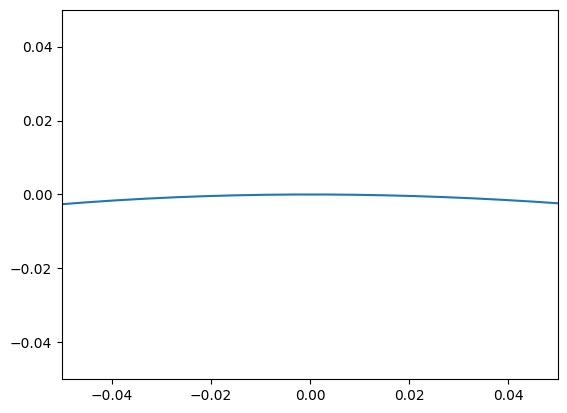

In [27]:
xplot=np.linspace(-1,2,1000)
fplot=(xplot-1)*xplot**2
plt.plot(xplot,fplot)
plt.xlim(-0.05,0.05)
plt.ylim(-0.05,0.05)

<h4>Part 2

<h5>a)

In [30]:
fa=lambda x:(x-1)*(x-3)*(x-5)
driver(fa,0,2.4)

the approximate root is 1.0000030517578122
the error message reads: 0
f(astar) = 2.4414006618542327e-05


b)

In [31]:
fb=lambda x: (x-3)*(x-1)**2
driver(fb,0,2)

the approximate root is 0
the error message reads: 1
f(astar) = -3


c)

In [32]:
fc = lambda x: np.sin(x)
driver(fc,0,0.1)

the approximate root is 0
the error message reads: 0
f(astar) = 0.0


In [33]:
driver(fc,0.5,3*np.pi/4)

the approximate root is 0.5
the error message reads: 1
f(astar) = 0.479425538604203


These results make sense as the ones with a lot of subtraction lead to high error, and the bisection method doesn't work for the ones where our root doesnt cross the x-axis. It achieved the desired accuracy for the ones that worked.

<h4>Problem 3

In [36]:
f31 = lambda x: x*(1+(7-x**5)/(x**2))
f32 = lambda x: x-(x**5-7)/(x**2)
driver2(f31,f32,0)

ZeroDivisionError: division by zero